In [28]:
! pip install mysql-connector-python

In [29]:
! pip install pymysql

In [30]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Connect the database
user = 'danicoco'
password = 'password'
host = 'localhost'
port = '3306'
database = 'legodb'

In [32]:
# Create the connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

In [33]:
# Create the engine
engine = create_engine(connection_string)

In [34]:
# Connect to the database
connection = engine.connect()

In [35]:
# Hypothesis 1: Number of Sets per Theme
query1 = """
SELECT themes.name AS Theme, COUNT(*) AS `Number of sets`
FROM themes
LEFT JOIN sets ON themes.id = sets.theme_id
GROUP BY themes.name
ORDER BY COUNT(*) DESC
LIMIT 10;
"""
df1 = pd.read_sql(query1, connection)
print(df1)

           Theme  Number of sets
0   Supplemental             904
1        Technic             666
2           City             572
3        Friends             519
4      Basic Set             505
5        Creator             493
6           Gear             477
7  Service Packs             435
8          Duplo             430
9   Construction             378


In [36]:
# Hypothesis 2: Top 10 Sets with the Most Parts
query2 = """
SELECT DISTINCT name, num_parts
FROM sets
ORDER BY num_parts DESC
LIMIT 20;
"""
df2 = pd.read_sql(query2, connection)
print(df2)

                                  name  num_parts
0                            Taj Mahal       5922
1   Star Wars / M&M Mosaic - Promo Set       5461
2               Window Exploration Bag       5200
3              Millennium Falcon - UCS       5195
4               Firehouse Headquarters       4640
5         Personalised Mosaic Portrait       4501
6                         Tower Bridge       4295
7                              Big Ben       4166
8                    The Disney Castle       4060
9                           Death Star       4023
10                     Assembly Square       4009
11              Bucket Wheel Excavator       3928
12                          Death Star       3807
13                       Death Star II       3460
14            Eiffel Tower 1:300 Scale       3428
15                         Sandcrawler       3294
16                      Grand Carousel       3260
17                Super Star Destroyer       3151
18       Imperial Star Destroyer - UCS       3115


In [38]:
# Hypothesis 3: Top 10 Sets with the Least Parts
query3 = """
SELECT DISTINCT name, num_parts
FROM sets
WHERE num_parts >= 1
ORDER BY num_parts ASC
LIMIT 10;
"""
df3 = pd.read_sql(query3, connection)
print(df3)

                                                name  num_parts
0                                    12V Light Brick          1
1                                    12V Motor (old)          1
2                  12V New Transformer for 110V Pack          1
3                  12V New Transformer for 220V Pack          1
4   12V Rail Contact Wire with Transformer Connector          1
5  12V Rail Contact Wire with Transformer Connect...          1
6                     12V Replacement Electric Motor          1
7                                  12V Technic Motor          1
8                      12V Transformer for 220V Pack          1
9                               2x2 Electrical Plate          1


In [39]:
# Hypothesis 4: Themes with the Most Parts
query4 = """
SELECT themes.name AS Theme, SUM(num_parts) AS `Total amount of parts for the theme`
FROM themes
LEFT JOIN sets ON themes.id = sets.theme_id
GROUP BY themes.name
ORDER BY SUM(num_parts) DESC
LIMIT 10;
"""
df4 = pd.read_sql(query4, connection)
print(df4)

                     Theme  Total amount of parts for the theme
0                Basic Set                             199262.0
1  Star Wars Episode 4/5/6                             166978.0
2             Construction                              99943.0
3                  Creator                              90793.0
4                  Technic                              88527.0
5               Sculptures                              78963.0
6                  Traffic                              77685.0
7                  Ninjago                              74767.0
8                  Friends                              69814.0
9                Star Wars                              68111.0


In [41]:
# Hypothesis 5: Quantity of pieces in the Oldest Sets
query5 = """
SELECT DISTINCT name, year, num_parts
FROM sets
WHERE year = (SELECT MIN(year) FROM sets)
ORDER BY num_parts DESC
LIMIT 10;
"""
df5 = pd.read_sql(query5, connection)
print(df5)

                                                name  year  num_parts
0  Automatic Binding Bricks Small Brick Set (Lego...  1950         24
1                            Individual 2 x 4 Bricks  1950         10
2                            Individual 2 x 2 Bricks  1950          9
3        Individual 1 x 2 x 2 Window (without glass)  1950          7
4        Individual 1 x 2 x 3 Window (without glass)  1950          7
5          Individual 1 x 2 x 4 Door (without glass)  1950          7
6        Individual 1 x 4 x 2 Window (without glass)  1950          7


In [42]:
# Hypothesis 6: Changes in the quantity of pieces in LEGO sets from 1950 until 2017
query6 = """
SELECT year, FLOOR(AVG(num_parts)) AS avg_num_parts
FROM sets
GROUP BY year
ORDER BY year ASC;
"""
df6 = pd.read_sql(query6, connection)
print(df6)

    year  avg_num_parts
0   1950             10
1   1953             16
2   1954             12
3   1955             37
4   1956             19
..   ...            ...
61  2013            183
62  2014            172
63  2015            208
64  2016            264
65  2017            265

[66 rows x 2 columns]


In [43]:
# Close the connection
connection.close()

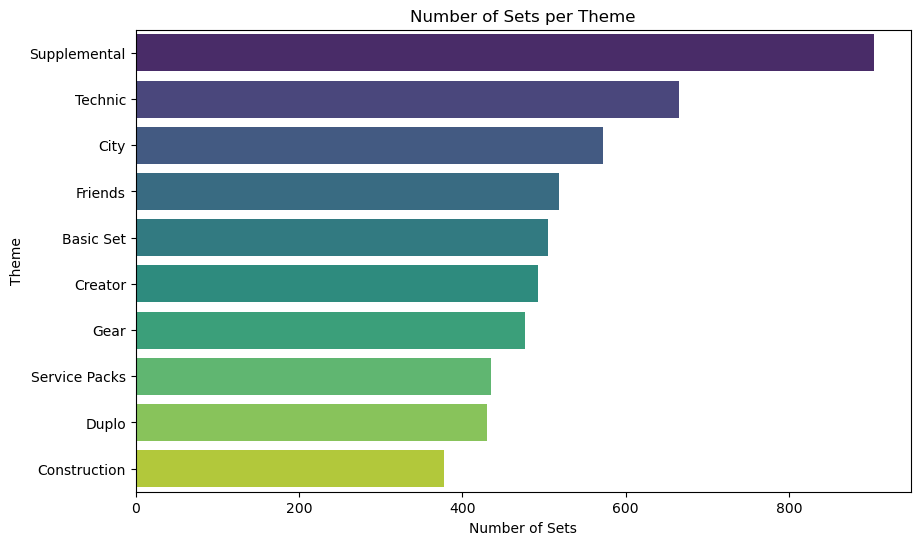

In [44]:
# Visualization examples:
# Hypothesis 1: Number of Sets per Theme
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of sets', y='Theme', data=df1, palette='viridis')
plt.title('Number of Sets per Theme')
plt.xlabel('Number of Sets')
plt.ylabel('Theme')
plt.show()

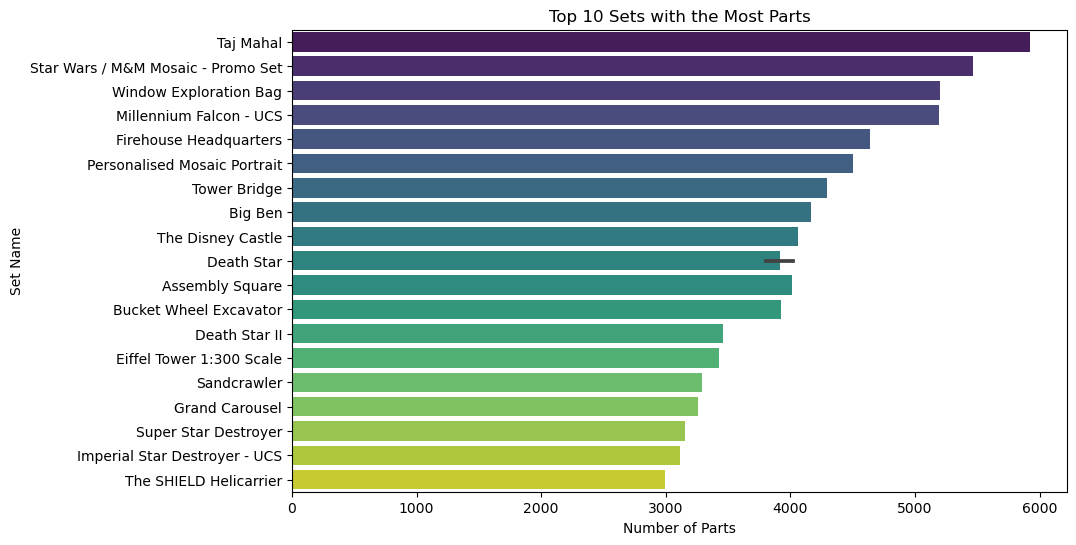

In [45]:
# Hypothesis 2: Top 10 Sets with the Most Parts
plt.figure(figsize=(10, 6))
sns.barplot(x='num_parts', y='name', data=df2, palette='viridis')
plt.title('Top 10 Sets with the Most Parts')
plt.xlabel('Number of Parts')
plt.ylabel('Set Name')
plt.show()

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


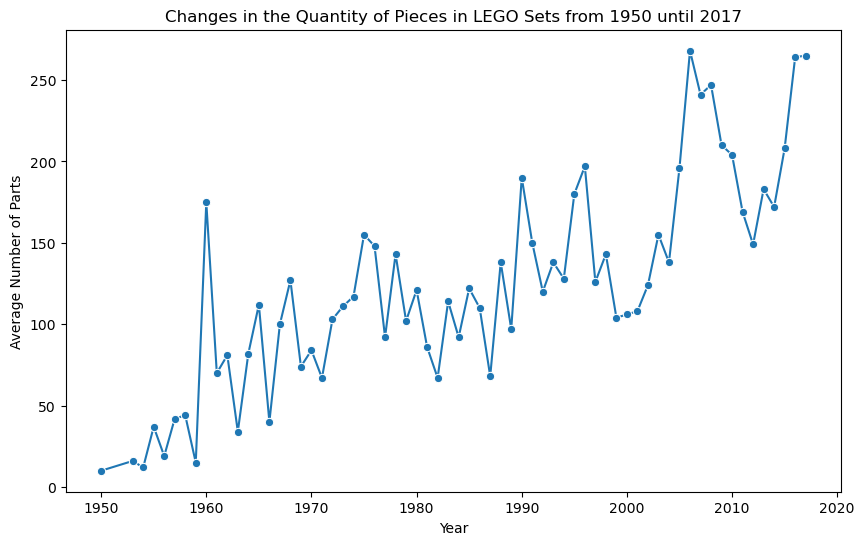

In [46]:
# Hypothesis 6: Changes in the quantity of pieces in LEGO sets from 1950 until 2017
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='avg_num_parts', data=df6, marker='o')
plt.title('Changes in the Quantity of Pieces in LEGO Sets from 1950 until 2017')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.show()